In [1]:
#import require python classes and packages
import pandas as pd #pandas to read and explore dataset
import numpy as np
import matplotlib.pyplot as plt #use to visualize dataset vallues
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm #SVM class
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
import os
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pickle

Using TensorFlow backend.
c:\users\adin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\adin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\adin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [3]:
#loading and displaying predictive maintnance dataset
dataset = pd.read_csv("Dataset/predictive_maintenance.csv")
dataset

,UDI,Product_ID,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target,Failure_Type
0,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
1,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
2,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
3,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
4,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
514,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
515,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
516,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
517,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [2]:
#describing dataset with details like count, mean, standard deviation of each dataset attributes
dataset.describe()

NameError: name 'dataset' is not defined

In [3]:
#visualizing distribution of numerical data
dataset.hist(figsize=(10, 8))
plt.title("Representation of Dataset Attributes")
plt.show()

NameError: name 'dataset' is not defined

In [4]:
#finding and displaying count of missing or null values
dataset.isnull().sum()

NameError: name 'dataset' is not defined

In [5]:
#finding & plotting graph of failure machine parts which required maintenance
#visualizing class labels count found in dataset
labels, count = np.unique(dataset['Failure_Type'].ravel(), return_counts = True)
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (4, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

NameError: name 'dataset' is not defined

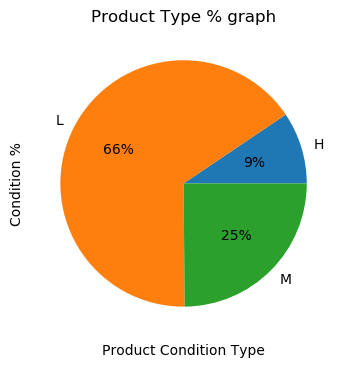

In [9]:
#visualizing product quality as number of Low, high and medium quality
#describe and plotting graph of various Product Current Quality %  found in dataset 
dataset.groupby("Type").size().plot.pie(autopct='%.0f%%', figsize=(4, 4))
plt.title("Product Type % graph")
plt.xlabel("Product Condition Type")
plt.ylabel("Condition %")
plt.show()

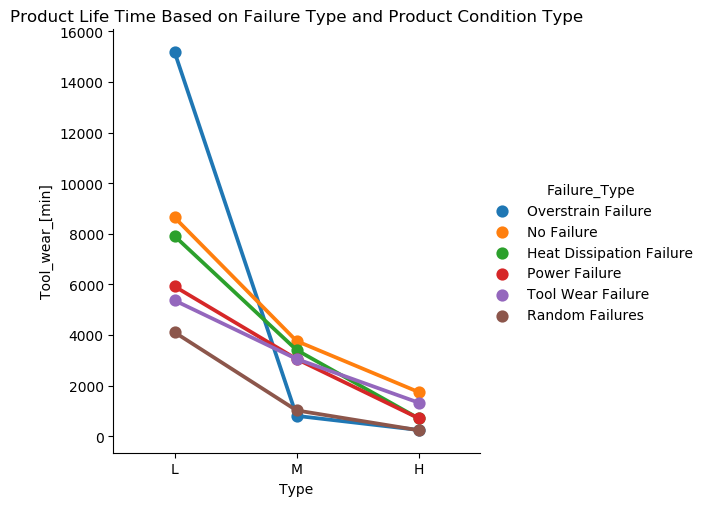

In [10]:
#visualizing tool life with different failure conditions
data = dataset.groupby(['Failure_Type', 'Type'])['Tool_wear_[min]'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x="Type", y="Tool_wear_[min]", hue='Failure_Type', data=data, kind='point')
plt.title("Product Life Time Based on Failure Type and Product Condition Type")
plt.show()

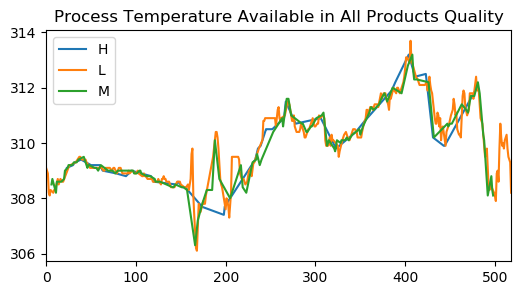

In [11]:
dataset.groupby('Type')['Process_temperature_[K]'].plot(legend=True, figsize=(6,3))
plt.title("Process Temperature Available in All Products Quality")
plt.show()

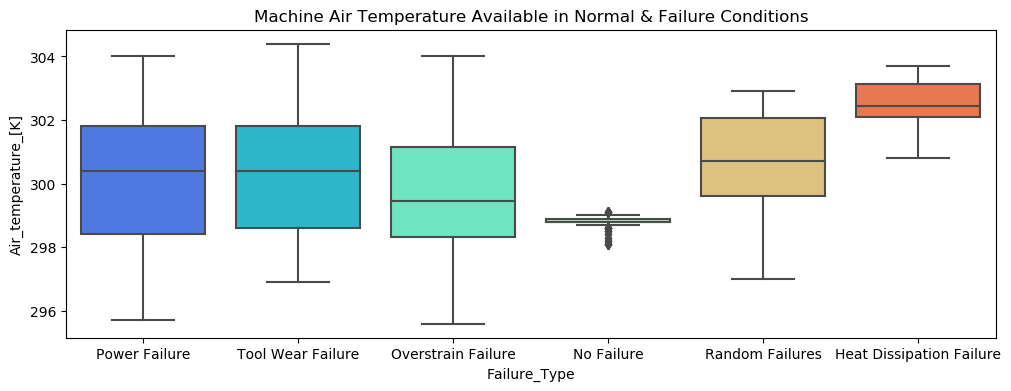

In [12]:
data = dataset[['Failure_Type', 'Air_temperature_[K]', 'Rotational_speed_[rpm]', 'Torque_[Nm]']]
plt.figure(figsize=(12,4))
sns.boxplot(data=data, x='Failure_Type', y='Air_temperature_[K]', palette='rainbow')
plt.title("Machine Air Temperature Available in Normal & Failure Conditions")
plt.show()

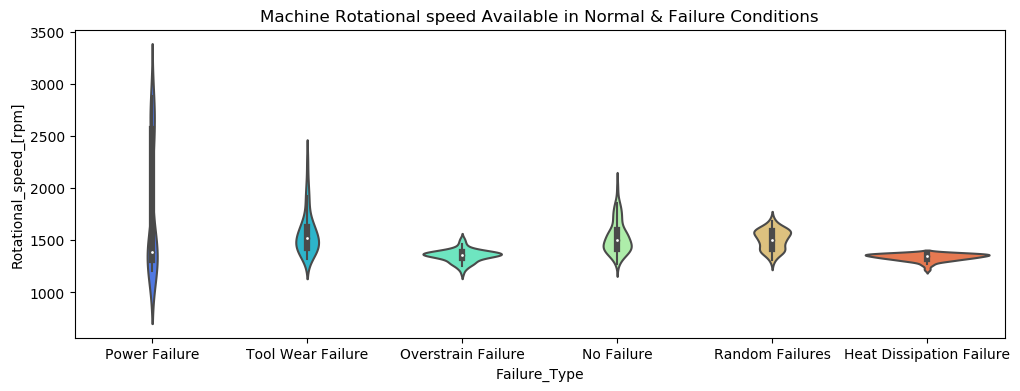

In [13]:
plt.figure(figsize=(12,4))
sns.violinplot(data=data, x='Failure_Type', y='Rotational_speed_[rpm]', palette='rainbow')
plt.title("Machine Rotational speed Available in Normal & Failure Conditions")
plt.show()

In [14]:
#using label encoder converting non-numeric values to numeric values
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
dataset['Product_ID'] = pd.Series(encoder1.fit_transform(dataset['Product_ID'].astype(str)))#encode all str columns to numeric
dataset['Type'] = pd.Series(encoder2.fit_transform(dataset['Type'].astype(str)))#encode all str columns to numeric
dataset['Failure_Type'] = pd.Series(encoder3.fit_transform(dataset['Failure_Type'].astype(str)))#encode all str columns to numeric
#dataset pre-processing like removing irrelevant features and selecting relevant features from the dataset
dataset.drop(['UDI', 'Target'], axis = 1,inplace=True)
print("Dataset After Cleaning & Processing")
dataset

Dataset After Cleaning & Processing


,Product_ID,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Failure_Type
0,65,1,298.9,309.1,2861,4.6,143,3
1,78,1,298.9,309.0,1410,65.7,191,3
2,85,1,298.8,308.9,1455,41.3,208,5
3,131,1,298.4,308.2,1282,60.7,216,2
4,132,1,298.3,308.1,1412,52.3,218,2
...,...,...,...,...,...,...,...,...
514,366,1,298.6,309.8,2271,16.2,218,5
515,367,1,298.5,309.5,1294,66.7,12,3
516,368,1,298.5,309.4,1360,60.9,187,2
517,369,1,298.3,309.3,1337,56.1,206,2


In [15]:
#dataset shuffling and normalization
rul = dataset['Tool_wear_[min]'].ravel()#represents life of machine (rul = remaining useful life)
Y = dataset['Failure_Type'].ravel()#represents machine failure or normal
data = dataset.values
X = data[:,0:dataset.shape[1]-1]
indices = np.arange(X.shape[0])
np.random.shuffle(indices)#shuffling dataset values
X = X[indices]
Y = Y[indices]
rul = rul[indices]
#normalizing dataset values
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)#normalize train features
print("Normalize Training Features")
print(X)

Normalize Training Features
[[0.34279919 0.5        0.45454545 ... 0.22815249 0.43543956 0.74703557]
 [0.36916836 0.5        0.47727273 ... 0.06920821 0.84203297 0.83794466]
 [0.92292089 1.         0.77272727 ... 0.11612903 0.61950549 0.4229249 ]
 ...
 [0.1643002  0.5        0.38636364 ... 0.24105572 0.42857143 0.79051383]
 [0.2515213  0.5        0.36363636 ... 0.11026393 0.67582418 0.54545455]
 [0.67748479 0.5        0.55681818 ... 0.05219941 0.875      0.82213439]]


In [16]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset= "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 519
Total features found in dataset= 7
80% dataset for training : 415
20% dataset for testing  : 104


In [17]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [18]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 3))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_tpr, ns_fpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

SVM Algorithm Accuracy  : 89.42307692307693
SVM Algorithm Precision : 89.14507061565885
SVM Algorithm Recall    : 86.96248196248196
SVM Algorithm FSCORE    : 87.62084101933456


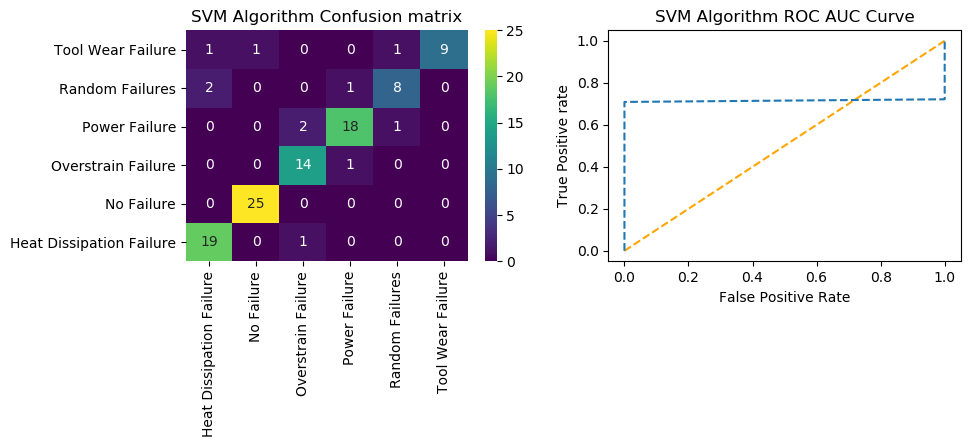

In [19]:
#training and evaluating performance of SVM algorithm
svm_cls = svm.SVC(C=50)
svm_cls.fit(X_train, y_train)#train algorithm using training features and target value
predict = svm_cls.predict(X_test) #perform prediction on test data
#call this function with true and predicted values to calculate accuracy and other metrics
calculateMetrics("SVM Algorithm", y_test, predict)

Decision Tree Algorithm Accuracy  : 92.3076923076923
Decision Tree Algorithm Precision : 93.27053140096618
Decision Tree Algorithm Recall    : 91.74675324675326
Decision Tree Algorithm FSCORE    : 92.41100445448271


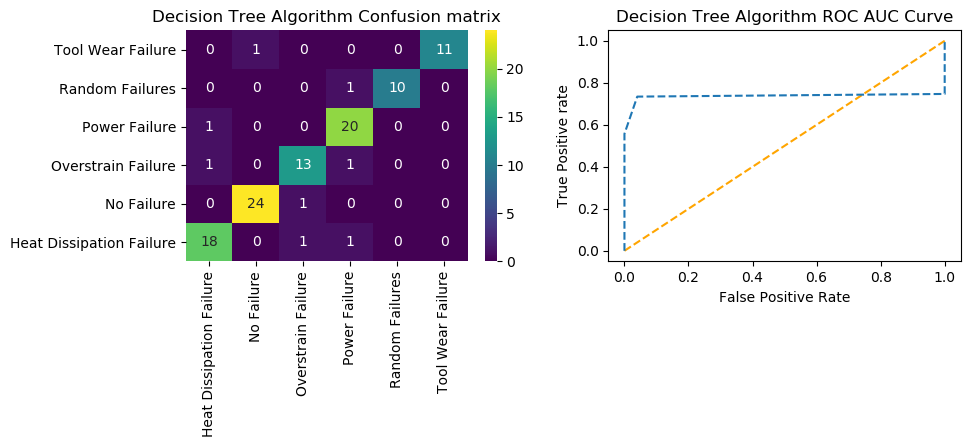

In [20]:
#training and evaluating performance of decision tree algorithm
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)#train algorithm using training features and target value
predict =dt_cls.predict(X_test)#perform prediction on test data
#call this function with true and predicted values to calculate accuracy and other metrics
calculateMetrics("Decision Tree Algorithm", y_test, predict)

Random Forest Accuracy  : 90.38461538461539
Random Forest Precision : 91.71587671587672
Random Forest Recall    : 88.35137085137085
Random Forest FSCORE    : 89.3813977141018


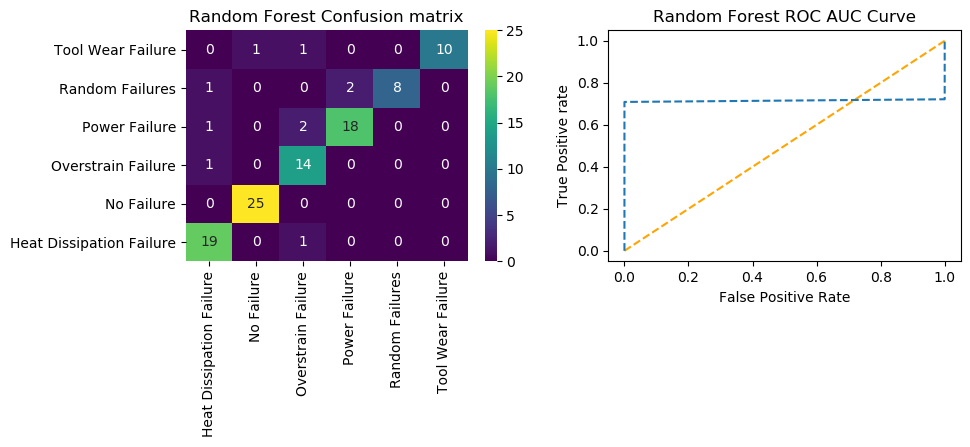

In [21]:
#training and evaluating performance of RandomForestClassifier algorithm
regressor = RandomForestRegressor()
regressor.fit(X, rul)
rf_cls = RandomForestClassifier(max_depth=10)
rf_cls.fit(X_train, y_train)#train algorithm using training features and target value
predict = rf_cls.predict(X_test)#perform prediction on test data
#call this function with true and predicted values to calculate accuracy and other metrics
calculateMetrics("Random Forest", y_test, predict)

KNN Accuracy  : 81.73076923076923
KNN Precision : 85.55555555555556
KNN Recall    : 78.74098124098124
KNN FSCORE    : 79.65443912812334


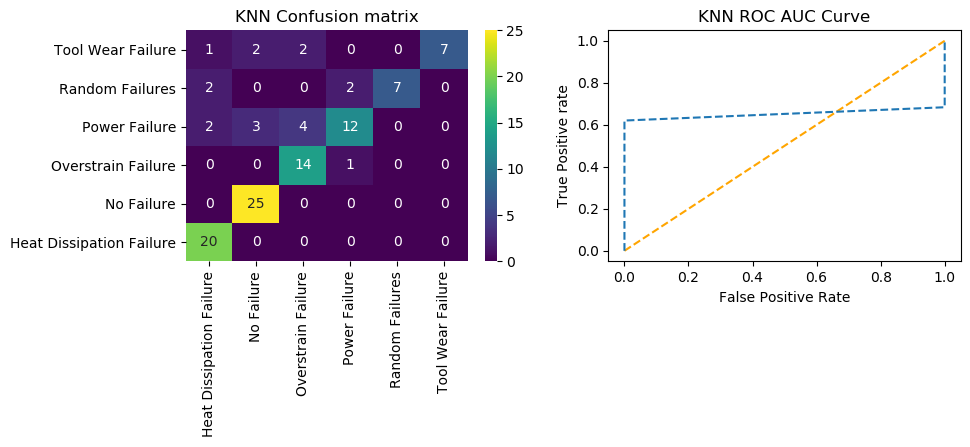

In [22]:
#training and evaluating performance of RandomForestClassifier algorithm
knn_cls = KNeighborsClassifier(n_neighbors=2)
knn_cls.fit(X_train, y_train)#train algorithm using training features and target value
predict = knn_cls.predict(X_test)#perform prediction on test data
#call this function with true and predicted values to calculate accuracy and other metrics
calculateMetrics("KNN", y_test, predict)



CNN Accuracy  : 95.1923076923077
CNN Precision : 95.00291375291377
CNN Recall    : 93.76262626262624
CNN FSCORE    : 94.27778822486835


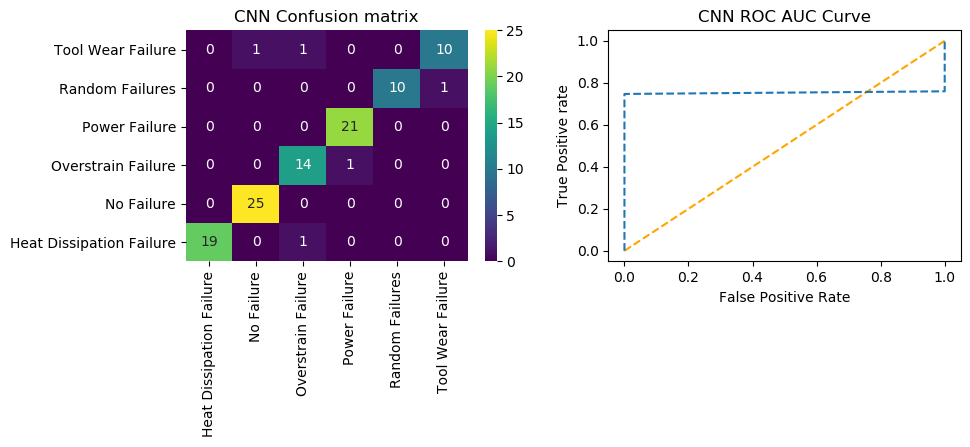

In [23]:
#training CNN deep learning algorithm to predict factory maintenaance
#converting dataset shape for CNN comptaible format as 4 dimension array
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
#creating deep learning cnn model object
cnn_model = Sequential()
#defining CNN layer wwith 32 neurons of size 1 X 1 to filter dataset features 32 times
cnn_model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#defining maxpool layet to collect relevant filtered features from previous CNN layer
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#creating another CNN layer with 16 neurons to optimzed features 16 times
cnn_model.add(Convolution2D(16, (1, 1), activation = 'relu'))
#max layet to collect relevant features
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#convert multidimension features to single flatten size
cnn_model.add(Flatten())
#define output prediction layer
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = y_train1.shape[1], activation = 'softmax'))
#compile, train and load CNN model
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train1, y_train1, batch_size = 4, epochs = 50, validation_data=(X_test1, y_test1), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")
#perform prediction on test data   
predict = cnn_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("CNN", y_test1, predict)

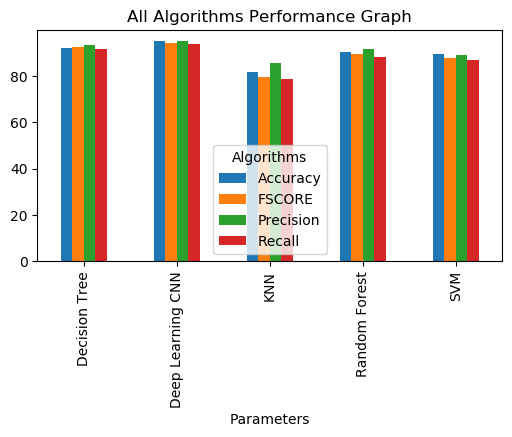

In [25]:
#comparison graph between all algorithms
df = pd.DataFrame([['SVM','Accuracy',accuracy[0]],['SVM','Precision',precision[0]],['SVM','Recall',recall[0]],['SVM','FSCORE',fscore[0]],
                   ['Decision Tree','Accuracy',accuracy[1]],['Decision Tree','Precision',precision[1]],['Decision Tree','Recall',recall[1]],['Decision Tree','FSCORE',fscore[1]],
                   ['Random Forest','Accuracy',accuracy[2]],['Random Forest','Precision',precision[2]],['Random Forest','Recall',recall[2]],['Random Forest','FSCORE',fscore[2]],
                   ['KNN','Accuracy',accuracy[3]],['KNN','Precision',precision[3]],['KNN','Recall',recall[3]],['KNN','FSCORE',fscore[3]],
                   ['Deep Learning CNN','Accuracy',accuracy[4]],['Deep Learning CNN','Precision',precision[4]],['Deep Learning CNN','Recall',recall[4]],['Deep Learning CNN','FSCORE',fscore[4]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(6, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [26]:
#display all algorithm performnace
algorithms = ['SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Deep Learning CNN']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data   

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,SVM,89.423077,89.145071,86.962482,87.620841
1,Decision Tree,92.307692,93.270531,91.746753,92.411004
2,Random Forest,90.384615,91.715877,88.351371,89.381398
3,KNN,81.730769,85.555556,78.740981,79.654439
4,Deep Learning CNN,95.192308,95.002914,93.762626,94.277788


In [27]:
test_data = pd.read_csv("Dataset/testData.csv")
temp = test_data.values
#using label encoder converting non-numeric values to numeric values
test_data['Product_ID'] = pd.Series(encoder1.transform(test_data['Product_ID'].astype(str)))#encode all str columns to numeric
test_data['Type'] = pd.Series(encoder2.transform(test_data['Type'].astype(str)))#encode all str columns to numeric
#dataset pre-processing like removing irrelevant features and selecting relevant features from the dataset
test_data.drop(['UDI'], axis = 1,inplace=True)
test_data = test_data.values
test_data = scaler.transform(test_data)
#life prediction before maintenance
life = regressor.predict(test_data)
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1, 1))
#failure prediction
predict = cnn_model.predict(test_data)
for i in range(len(predict)):
    pred = np.argmax(predict[i])
    print("Test Data : "+str(temp[i])+" ====> Predicted Failure : "+labels[pred])
    print("Available Life Maintenance = "+str(100 - (life[i]/10))+"\n")

Test Data : [195 'M15054' 'M' 298.2 308.5 2678 10.7 86] ====> Predicted Failure : Power Failure
Available Life Maintenance = 91.44

Test Data : [208 'M15067' 'M' 298.4 308.7 1421 60.7 119] ====> Predicted Failure : Power Failure
Available Life Maintenance = 88.116

Test Data : [243 'L47422' 'L' 298.0 308.2 1348 58.8 202] ====> Predicted Failure : Overstrain Failure
Available Life Maintenance = 79.797

Test Data : [249 'L47428' 'L' 298.0 308.3 1362 56.8 216] ====> Predicted Failure : Overstrain Failure
Available Life Maintenance = 78.404

Test Data : [17 'M14876' 'M' 298.6 309.2 1311 46.6 44] ====> Predicted Failure : No Failure
Available Life Maintenance = 95.584

Test Data : [18 'M14877' 'M' 298.7 309.2 1410 45.6 47] ====> Predicted Failure : No Failure
Available Life Maintenance = 95.284

Test Data : [1510 'L48689' 'L' 298.0 308.5 1429 37.7 220] ====> Predicted Failure : Tool Wear Failure
Available Life Maintenance = 77.997

Test Data : [1683 'H31096' 'H' 297.9 307.4 1604 36.1 225] =